In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv 
from numpy.linalg import norm 

from functions import Rosenbrock, RosenbrockH, RosenbrockJ, Bowl, BowlJ, BowlH
# RESOURCES
# https://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09G_Gradient_Descent_Optimization.html 

In [500]:
def GradientDescent1D(x0, F, J, tol, Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return[xstar, ier, its, x0]

    
    xStep = [x0]
    for its in range(Nmax):
        # Evaluate J and compute its inverse     
        Jeval = J(x0)

        # Find the step length
        # alpha = 0.99
        dk = -Jeval
        alpha = backTrackingLineSearch(x0, F, Jeval, dk)

        # Update step
        p0 = Jeval

        # Calculate the step 
        x1 = x0 - alpha * p0
        xStep = xStep + [x1.tolist()]

    
        # If we found the root (to within the tolerance), return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its, xStep]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its, xStep]

def GradientDescentnD(x0, F, J, tol, Nmax):

    ''' Lazy Newton = use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return


    for its in range(Nmax):
        # Evaluate J and compute its inverse     
        Jeval = J(x0)
        Jtranspose= np.transpose(Jeval)          
    
        # Evaluate F
        Feval = F(x0)

        # Find the step length
        alpha = 0.8 # THIS IS SOMETHING WE WANT TO FIND AN IMPLEMENTATION TO

        p0 = Jtranspose.dot(Feval)

        # Calculate the step 
        x1 = x0 - alpha * p0
    
        # If we found the root (to within the tolerance), 
        # return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its]

def NewtonDescent(x0, F, J, H, tol, Nmax):

    ''' NewtonDescent: use only the inverse of the Jacobian for initial guess'''
    ''' inputs: x0 = initial guess, F = Function, J = Jacobian of F,tol = tolerance, Nmax = max its'''
    ''' Outputs: xstar= approximate root, ier = error message, its = num its'''

    # Checks to see if the function is already at the root
    if norm(F(x0)) == 0: 
        xstar = x0
        ier = 0
        its = 0
        return

    xStep = [x0]

    for its in range(Nmax):
        # Evaluate J    
        Jeval = J(x0)
        
        # Evaluates the Hessian and computes its inverse
        Heval = H(x0)   
        Hinv = inv(Heval)      

        # Find the step length
        p0 = Hinv.dot(Jeval)

        # alpha = backTrackingLineSearch(x0, F, Jeval, dk, p = 0.5, alpha=1, c=1e-4)
        alpha = backTrackingLineSearch(x0, F, Jeval, -p0)

        # Calculate the step 
        x1 = x0 - alpha*p0
        xStep = xStep + [x1.tolist()]
       
        # If we found the root (to within the tolerance), 
        # return it and 0 for the error message
        if (norm(x1 - x0) < tol):
           xstar = x1
           ier = 0
           return[xstar, ier, its, xStep]
        
        x0 = x1
    
    # If we didn't find the root, return the step and an error of 1
    xstar = x1
    ier = 1
    return[xstar, ier, its, xStep]


def backTrackingLineSearch(xk, F, grad_xk, dk, p = 0.5, c=0.01):

    ''' backTrackingLineSearch: calculate optimal alpha using Armijo condition'''
    ''' inputs: xk = step location, F = function, grad_xk = gradient of F, dk = descent direction, p = step length, c = Armijo constant'''
    ''' Outputs: alpha = step size'''

    # Initial guess for alpha
    alpha = 1.0
    
    # While the Amrijo condition is not satisfied, keep decreasing alpha
    while F(xk + alpha * dk) > F(xk) + c * alpha * np.dot(grad_xk, dk): 
        
        # Update alpha
        alpha = p * alpha

    # Return alpha
    return alpha

Root: [0. 0.] 
	 error? 0 
	 iterations: 1
Root: [1. 1.] 
	 error? 0 
	 iterations: 31920


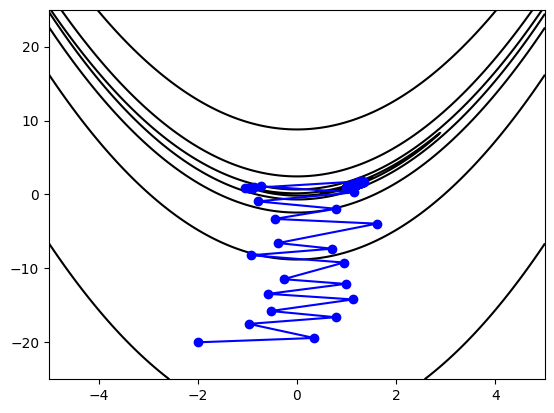

In [501]:
# Initial conditions and parameters
x0 = [-2, -20]
tol = 1e-15
Nmax = 100000

root, error, iterations, steps = GradientDescent1D(x0, Bowl, BowlJ, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)


root, error, iterations,steps = GradientDescent1D(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

steps = np.array(steps)

a = 5; b = 25;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(steps[:,0],steps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-a, a, 10),
            colors='black',
            zorder=0)
plt.show()

In [ ]:
x0 = [-2, -20]
tol = 1e-15
Nmax = 100000

root, error, iterations, steps = NewtonDescent(x0, Bowl, BowlJ, BowlH, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

root, error, iterations, steps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

Root: [0. 0.] 
	 error? 0 
	 iterations: 1
Root: [1. 1.] 
	 error? 0 
	 iterations: 26


Root: [1. 1.] 
	 error? 0 
	 iterations: 31920
Root: [1. 1.] 
	 error? 0 
	 iterations: 26


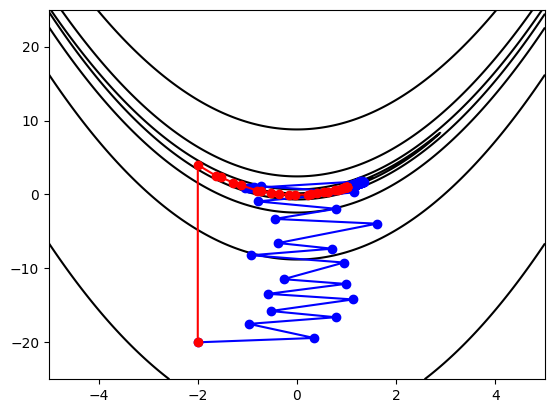

In [514]:
# Initial conditions and parameters
x0 = [-2, -20]
tol = 1e-15
Nmax = 100000

root, error, iterations, GradientDescent1DSteps = GradientDescent1D(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

root, error, iterations, NewtonDescentSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

GradientDescent1DSteps = np.array(GradientDescent1DSteps)
NewtonDescentSteps = np.array(NewtonDescentSteps)

a = 5; b = 25;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GradientDescent1DSteps[:,0], GradientDescent1DSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NewtonDescentSteps[:,0], NewtonDescentSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-a, a, 10),
            colors='black',
            zorder=0)
plt.show()

Root: [0. 0.] 
	 error? 0 
	 iterations: 1
Root: [0. 0.] 
	 error? 0 
	 iterations: 1


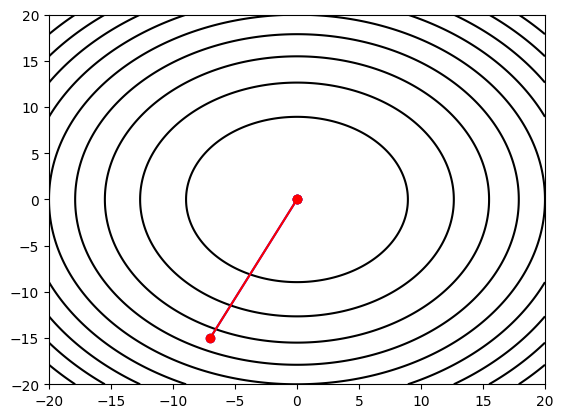

In [520]:
# Initial conditions and parameters
x0 = [-7, -15]
tol = 1e-15
Nmax = 100000

root, error, iterations, GradientDescent1DSteps = GradientDescent1D(x0, Bowl, BowlJ, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

root, error, iterations, NewtonDescentSteps = NewtonDescent(x0, Bowl, BowlJ, BowlH, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

GradientDescent1DSteps = np.array(GradientDescent1DSteps)
NewtonDescentSteps = np.array(NewtonDescentSteps)

a = 20; b = 20;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GradientDescent1DSteps[:,0], GradientDescent1DSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NewtonDescentSteps[:,0], NewtonDescentSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Bowl(evalPoints),
            levels=10,
            colors='black',
            zorder=0)
plt.show()

In [ ]:
# Initial conditions and parameters
x0 = [-7, -15]
tol = 1e-15
Nmax = 100000

root, error, iterations, GradientDescent1DSteps = GradientDescent1D(x0, Himme, BowlJ, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

root, error, iterations, NewtonDescentSteps = NewtonDescent(x0, Bowl, BowlJ, BowlH, tol, Nmax)
print("Root:", root, "\n\t error?", error, "\n\t iterations:", iterations)

GradientDescent1DSteps = np.array(GradientDescent1DSteps)
NewtonDescentSteps = np.array(NewtonDescentSteps)

a = 20; b = 20;

# Grid for plotting the function
x = np.linspace(-a, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GradientDescent1DSteps[:,0], GradientDescent1DSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NewtonDescentSteps[:,0], NewtonDescentSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Bowl(evalPoints),
            levels=10,
            colors='black',
            zorder=0)
plt.show()